In [1]:
from __future__ import annotations

import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import DescrStatsW

from estimark.estimation import get_weighted_moments
from estimark.parameters import age_mapping
from estimark.scf import scf_data_full

In [2]:
scf_data_full

,age,age_group,wealth_income_ratio,weight,wave
30,31,"(30,35]",6.697993,3676.299028,1995
31,31,"(30,35]",6.697993,3822.532451,1995
32,31,"(30,35]",6.697993,3779.582462,1995
33,31,"(30,35]",6.697993,3570.089875,1995
34,31,"(30,35]",6.697993,3803.353076,1995
...,...,...,...,...,...
232510,43,"(40,45]",9.602461,6283.187315,2019
232511,43,"(40,45]",11.444635,6639.658020,2019
232512,43,"(40,45]",11.547022,6580.343722,2019
232513,43,"(40,45]",10.413175,6515.081945,2019


In [3]:
moments = get_weighted_moments(
    data=scf_data_full,
    variable="wealth_income_ratio",
    weights="weight",
    groups="age_group",
    mapping=age_mapping,
)

In [4]:
moments

{'(25,30]': array([0.65763249]),
 '(30,35]': array([0.97360885]),
 '(35,40]': array([1.78172387]),
 '(40,45]': array([2.38910063]),
 '(45,50]': array([3.23681528]),
 '(50,55]': array([4.24488131]),
 '(55,60]': array([5.32876747]),
 '(60,65]': array([6.45894082]),
 '(65,70]': array([7.92872889]),
 '(70,75]': array([8.80298421]),
 '(75,80]': array([9.85313601]),
 '(80,85]': array([8.75530344]),
 '(85,90]': array([11.36179422]),
 '(90,95]': array([9.9756071])}

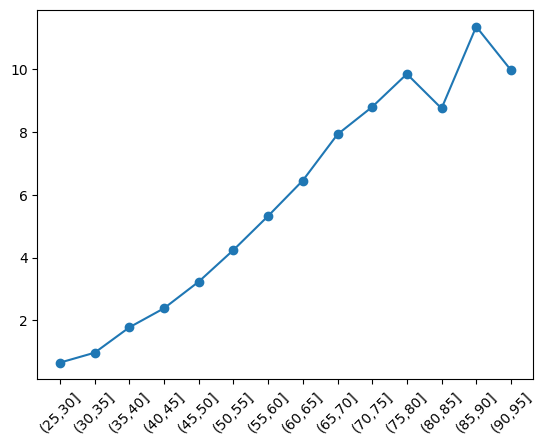

In [5]:
plt.plot(moments.values())
plt.scatter(range(len(moments)), moments.values())
plt.xticks(range(len(moments)), moments.keys(), rotation=45)
plt.show()

In [6]:
from estimark.snp import snp_data

In [7]:
snp_data

,age,share,age_group
51,71,0.393936,"(70,75]"
52,72,0.382074,"(70,75]"
53,73,0.370212,"(70,75]"
54,74,0.363326,"(70,75]"
55,75,0.356440,"(70,75]"
56,76,0.349554,"(75,80]"
57,77,0.342668,"(75,80]"
58,78,0.335781,"(75,80]"
59,79,0.332880,"(75,80]"
60,80,0.329979,"(75,80]"


In [8]:
share_moments = get_weighted_moments(
    data=snp_data,
    variable="share",
    groups="age_group",
    mapping=age_mapping,
    weights=None,
)

In [9]:
share_moments

{'(70,75]': 0.37021211462000003,
 '(75,80]': 0.33578140508,
 '(80,85]': 0.32127446132,
 '(85,90]': 0.32127446132,
 '(90,95]': 0.32127446132}

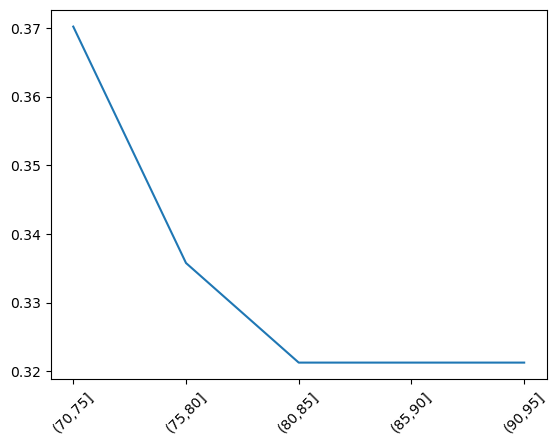

In [10]:
plt.plot(share_moments.values())
plt.xticks(range(len(share_moments)), share_moments.keys(), rotation=45)
plt.show()

In [11]:
def weighted_median(data, var, weights):
    dsw = DescrStatsW(data[var], weights=data[weights])
    return dsw.quantile(0.5, return_pandas=False)[0]


temp = (
    scf_data_full.groupby(["age_group", "wave"])
    .apply(weighted_median, var="wealth_income_ratio", weights="weight")
    .reset_index()
)

temp.groupby("age_group")[0].median()

/tmp/ipykernel_1341642/4146709120.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_median, var="wealth_income_ratio", weights="weight")


age_group
(25,30]     0.731227
(30,35]     0.943020
(35,40]     1.795652
(40,45]     2.158729
(45,50]     3.092055
(50,55]     4.271946
(55,60]     5.254823
(60,65]     6.300603
(65,70]     7.420071
(70,75]     9.049109
(75,80]    10.122164
(80,85]     9.787650
(85,90]    11.361794
(90,95]     9.056685
Name: 0, dtype: float64

/tmp/ipykernel_1341642/3494005669.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  scf_data_full.groupby(["age_group", "wave"]).apply(


<Axes: xlabel='age_group'>

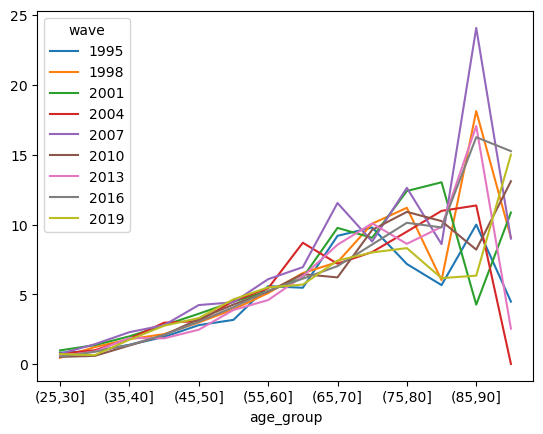

In [12]:
scf_data_full.groupby(["age_group", "wave"]).apply(
    weighted_median,
    var="wealth_income_ratio",
    weights="weight",
).unstack().plot()